In [1]:
import time
import pandas as pd
import numpy as np
# Load the filtered hotel reviews from CSV
df = pd.read_csv('Hotel_Reviews_NLP.csv')

In [2]:
df.head()

,Hotel_Name,Hotel_Address,Total_Number_of_Reviews,Average_Score,Reviewer_Score,Negative_Sentiment,Positive_Sentiment,Reviewer_Nationality,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Negative_Review,Positive_Review
0,South Place Hotel,"London, United Kingdom",326,9.3,2.5,-0.9849,-0.9820,Brazil,0,1,0,0,0,0,0,0,No windows claustrophobic place even superior ...,Bathroom Shower We going stay twice hotel 2 ni...
1,Park Plaza County Hall London,"London, United Kingdom",2223,8.4,3.8,-0.9780,-0.9780,Saudi Arabia,1,0,0,0,0,1,0,0,I completely disappointed mad since reception ...,I completely disappointed mad since reception ...
2,Britannia International Hotel Canary Wharf,"London, United Kingdom",4789,6.8,3.3,-0.4767,-0.9751,Australia,1,1,0,0,0,0,0,0,everything terrible,get everything extra internet parking breakfas...
3,Caesar Hotel,"London, United Kingdom",317,8.3,3.3,0.1082,-0.9721,United States Minor Outlying Islands,1,0,0,0,1,0,0,0,Everything I worst experience ever best friend...,I didnt like anythig Room small Asked upgrade ...
4,Hotel Da Vinci,"Milan, Italy",1877,7.8,2.5,0.0000,-0.9703,United Kingdom,1,0,0,0,0,1,0,0,No Negative,Very rude manager abusive staff reception Dirt...


In [11]:
training_df = df.drop(['Hotel_Name','Hotel_Address','Total_Number_of_Reviews','Reviewer_Nationality',
         'Reviewer_Nationality',
         'Positive_Review','Negative_Review'],axis = 1)

In [12]:
X = training_df

In [13]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[2206574.6855899156,
 1209818.6543668397,
 957842.204833574,
 857675.796048067,
 784739.230057125,
 723693.205143528,
 678395.3536140857,
 643311.0124670243,
 610905.1414278278,
 585699.0377729865]

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


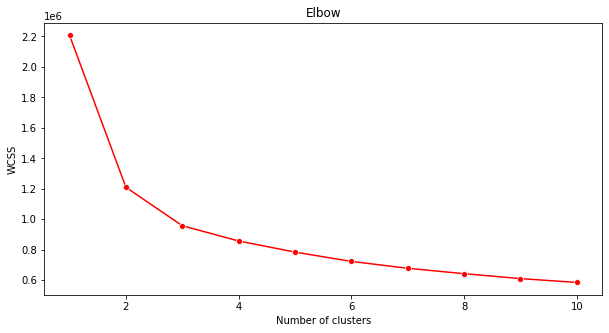

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

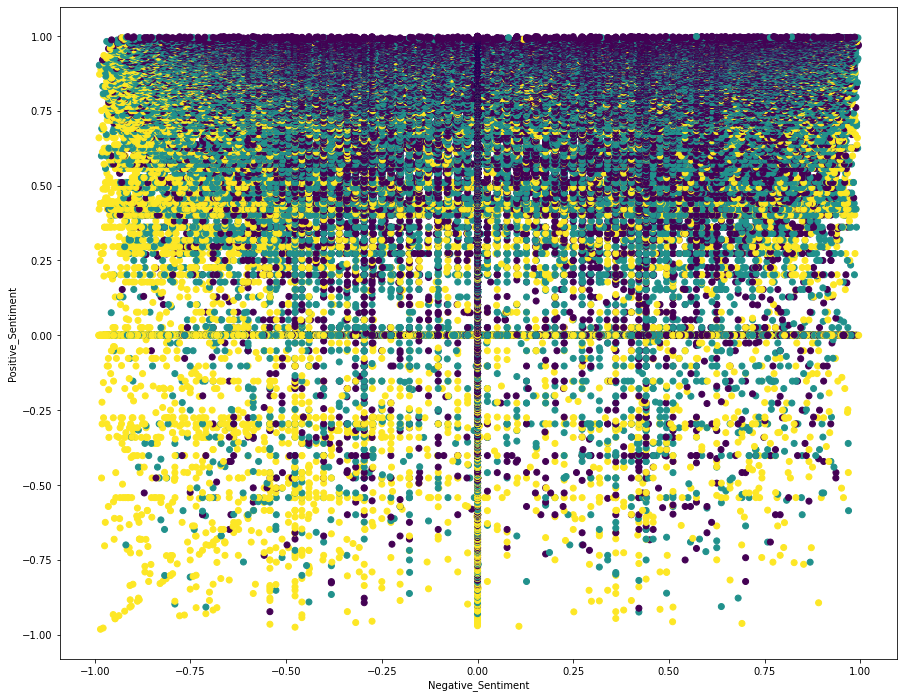

In [31]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
_, ax = plt.subplots(figsize=(15, 12))
ax.scatter(training_df['Negative_Sentiment'],training_df['Positive_Sentiment'],c = labels)
plt.xlabel('Negative_Sentiment')
plt.ylabel('Positive_Sentiment')
plt.show()